<br>Content:
1. [Loading Data and Explanation of Features](#1)
2. [Line Charts](#2)
3. [Scatter Charts](#3)
4. [Bar Charts](#4)
5. [Pie Charts](#5)
6. [Bubble Charts](#6)
7. [Histogram](#7)
8. [Word Cloud](#8)
9. [Box Plot](#9)
10. [Scatter Plot Matrix](#10)
11. Map Plots: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
12. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    2. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    3. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    4. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
13. [Inset Plots](#11)
14. [3D Scatter Plot with Colorscaling](#12)
15. [Multiple Subplots](#13)
16. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly



In [1]:
# pip install plotly
# conda install -c conda-forge wordcloud

In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [3]:
# Load data that we will use.
timesData = pd.read_csv("data/timesData.csv")

In [4]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [5]:
timesData.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


# Line Charts

In [6]:
timesData.loc[0:4, ["world_rank", "citations", "teaching"]] # Top 5 university

,world_rank,citations,teaching
0,1,98.8,99.7
1,2,99.9,97.7
2,3,99.9,97.8
3,4,99.2,98.3
4,5,99.9,90.9


### Note
Aşağıdaki kod bölümü bir kalıptır, bu kalıbı tüm plotly grafiklerinde kullanabiliriz.
```python 
    (
        x = df.world_rank,
        y = df.citations,
        mode = "lines", # What plot type will you use?
        name = "citations", # Plot name
        marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # Plot color 
        text= df.university_name) # info
```

In [7]:
# prepare data frame
df = timesData.iloc[0:100, :] # Top 100 university

# Creating trace1 
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations, # alıntı
                    mode = "lines", # What plot type will you use?
                    name = "citations", # Plot name
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # Plot color and opacity(0.8)
                    text= df.university_name) # info
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'), 
                    text = df.university_name) 
data = [trace1, trace2] # merge trace1 and trace2
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities', # title and substitle section
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout) # merge data and title
iplot(fig) # show fig

# Scatter
<font color='red'>
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [8]:
df2014 = (timesData[timesData.year == 2014].iloc[0:100,:]) # first 100 index

df2014.loc[:, ["world_rank", "citations"]] # Top 5 university

,world_rank,citations
1002,1,99.8
1003,2,99.1
1004,2,95.4
1005,4,99.1
1006,5,100.0
...,...,...
1097,96,82.3
1098,97,97.3
1099,98,65.8
1100,98,71.1


In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'), # pink color
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# Bar Charts
<font color='red'>
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)
<font color='black'>

In [10]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:] # top 3 university
df2014.loc[:, ['university_name', 'country','citations', 'teaching']] # print

,university_name,country,citations,teaching
1002,California Institute of Technology,United States of America,99.8,94.4
1003,Harvard University,United States of America,99.1,95.3
1004,University of Oxford,United Kingdom,95.4,89.0


In [11]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group") #yanyana gruplayarak koy
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<font color='red'>
Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2)
<br> Actually, if you change only the barmode from *group* to *relative* in previous example, you achieve what we did here. However, for diversity I use different syntaxes. 

In [12]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative', # ALTLI ÜSTLÜ KOY
  'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<font color='red'>
Third Bar Charts Example: Horizontal bar charts.  (style3) Citation vs income for universities

In [13]:
from plotly import tools

# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

C:\Users\Pointo2\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Pie Charts
<font color='red'>
Pie Charts Example: Students rate of top 7 universities in 2016

In [14]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
df2016.loc[:,["university_name", "num_students"]] #pie chart bize yüzde kaç olduğunu otomatik hesaplıyor.

,university_name,num_students
1803,California Institute of Technology,"2,243"
1804,University of Oxford,"19,919"
1805,Stanford University,"15,596"
1806,University of Cambridge,"18,812"
1807,Massachusetts Institute of Technology,"11,074"
1808,Harvard University,"20,152"
1809,Princeton University,"7,929"


In [15]:
pie1 = df2016.num_students # string(2,243) => must convert to float and 2.243 (npt comma, must be dot)
labels = df2016.university_name
pie1_list = [float(each.replace(',', '.')) for each in pie1]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
# figure
fig = {
  "data": [
    { # bu kıvırcıklar arası bir trace.
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3, #çemberin iç yarıçapı
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

# Bubble Charts {Scatter+Color+Size}
<font color='red'>
Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [16]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [17]:
df2016 = timesData[timesData.year == 2016].iloc[0:5,:] # top 5
df2016.loc[:, ['world_rank','university_name','teaching','international', 'num_students']]

,world_rank,university_name,teaching,international,num_students
1803,1,California Institute of Technology,95.6,64.0,"2,243"
1804,2,University of Oxford,86.5,94.4,"19,919"
1805,3,Stanford University,92.5,76.3,"15,596"
1806,4,University of Cambridge,88.2,91.5,"18,812"
1807,5,Massachusetts Institute of Technology,89.4,84.0,"11,074"


In [18]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:] # top 20
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students] #2,4(str) => 2.4(float)
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers', # noktalar
        'marker': { # buble plot features
            'color': international_color, # uluslararası puanı en yüksek üniversitenin rengi sarı=zurich
            'size': num_students_size, # öğrenci sayısı ile buble size doğru orantılı => en kalabalık üniversite=toranto 
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

# Histogram
<font color='red'>
Lets look at histogram of students-staff ratio in 2011 and 2012 years. 

In [19]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Word Cloud
<font color='red'>
Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.

In [20]:
x2011 = timesData.country[timesData.year == 2011]
x2011.head(10)

0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
5              United Kingdom
6              United Kingdom
7    United States of America
8              United Kingdom
9    United States of America
Name: country, dtype: object

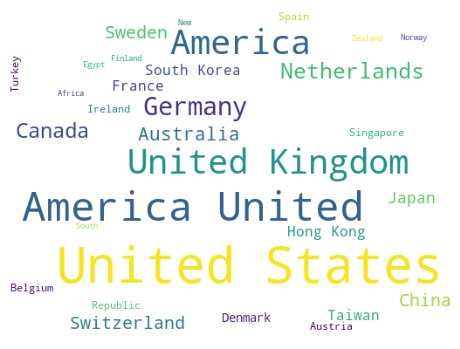

In [21]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off') # eksenleri kapatırım.
plt.show()

# Box Plots
- Box Plots
  
    - Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile) 
        
        - 25th percentile = quartile 1 (Q1) that is lower quartile 
        
        - 75th percentile = quartile 3 (Q3) that is higher quartile 
        - height of box = IQR = interquartile range = Q3-Q1 
        - Whiskers = 1.5 * IQR from the Q1 and Q3 
        - Outliers = being more than 1.5*IQR away from median commonly. 

In [22]:
x2015 = timesData[timesData.year == 2015]
x2015.iloc[:10 ,:].loc[:, ['university_name','total_score', 'research']] # top 10 university for controlling

,university_name,total_score,research
1402,California Institute of Technology,94.3,98.1
1403,Harvard University,93.3,98.6
1404,University of Oxford,93.2,97.7
1405,Stanford University,92.9,96.7
1406,University of Cambridge,92.0,95.6
1407,Massachusetts Institute of Technology,91.9,88.2
1408,Princeton University,90.9,94.7
1409,"University of California, Berkeley",89.5,96.7
1410,Imperial College London,87.5,88.3
1411,Yale University,87.5,90.8


In [23]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

# Scatter Matrix Plots
<font color='red'>
Scatter Matrix = it helps us to see covariance and relation between more than 2 features

In [24]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]] # 2 den fazla feature'u karşılaştırırız.
data2015["index"] = np.arange(1, len(data2015)+1)
# scatter matrix (köşelerde box olması için diagonal='box' yaparız)
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland', # yüksek için kırmızı, düşük için mavi rengi olan portland renk paleti
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

# Inset Plots
<font color='red'>
Inset Matrix = 2 plots are in one frame(ana plot aşağıda büyük, yardımcı plot yukarıda ve küçük)

In [25]:
timesData.iloc[:5 ,:].loc[:, ['world_rank','university_name','teaching', 'income']] # top 10 university for controlling

,world_rank,university_name,teaching,income
0,1,Harvard University,99.7,34.5
1,2,California Institute of Technology,97.7,83.7
2,3,Massachusetts Institute of Technology,97.8,87.5
3,4,Stanford University,98.3,64.3
4,5,Princeton University,90.9,-


In [26]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2', # küçük income plotu için x2, y2 diye ayrıca belirtiriz.
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95], # 2.plotun konumu
        anchor='y2',  # alt plot olduğunu belirtmek için axisleri belirtiriz    
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


# 3D Scatter Plot with Colorscaling
<font color='red'>
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.

In [27]:
dataframe.iloc[:5 ,:].loc[:, ['world_rank','university_name','research', 'citations']] # top 10 university for controlling

,world_rank,university_name,research,citations
1402,1,California Institute of Technology,98.1,99.7
1403,2,Harvard University,98.6,98.9
1404,3,University of Oxford,97.7,95.5
1405,4,Stanford University,96.7,99.1
1406,5,University of Cambridge,95.6,95.2


In [28]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers', # scatter veya bubble da bulunan noktacıklar.
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Multiple Subplots
<font color='red'>
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.

In [29]:
dataframe.iloc[:5 ,:].loc[:, ['world_rank','research', 'citations', 'income', 'total_score']]

,world_rank,research,citations,income,total_score
1402,1,98.1,99.7,89.1,94.3
1403,2,98.6,98.9,44.0,93.3
1404,3,97.7,95.5,72.9,93.2
1405,4,96.7,99.1,63.1,92.9
1406,5,95.6,95.2,51.1,92.0


In [30]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)